In [1]:
%pylab inline
from mpl_toolkits.mplot3d import Axes3D
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=16)

Populating the interactive namespace from numpy and matplotlib


In [2]:
TxType = np.dtype( [('height',np.int),\
                    ('id', np.unicode_, 6),\
                    ('bytes', np.int),\
                    ('contractCreation', np.bool),\
                    ('gasPrice', np.int),\
                    ('gasUsed', np.int),\
                    ('basicCost', np.int),\
                    ('sstoreGas', np.int),\
                    ('createGas', np.int),\
                    ('otherGas', np.int),\
                    ('sstoreBytes', np.int),\
                    ('createBytes', np.int)])

In [3]:
data = np.loadtxt('data.csv',dtype=TxType,delimiter=',')

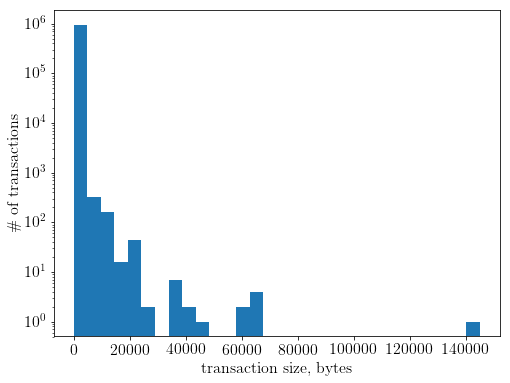

In [70]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
plt.yscale('log', nonposy='clip')
#ax.set_ylim([0.1,100])
ax.set_ylabel('\# of transactions')
ax.set_xlabel('transaction size, bytes')
#ax.set_yscale('log')
maxsize = max(data[:]['bytes'])
ax.hist(data[:]['bytes'],bins=range(0, maxsize+35, (maxsize+35)//30))
plt.savefig('size_stats.pdf')
plt.show()

In [19]:
def isStorage(x):
    return  x['sstoreBytes'] >0 and x['createBytes'] <= 0
def isCreate(x):
    return  x['sstoreBytes'] <=0 and x['createBytes'] > 0
def isBoth(x):
    return  x['sstoreBytes'] >0 and x['createBytes'] > 0
storageTxs = np.array(list(filter(isStorage, data)))
createTxs = np.array(list(filter(isCreate, data)))
bothTxs = np.array(list(filter(isBoth, data)))

In [20]:
print(len(data))
print(len(storageTxs))
print(len(createTxs))
print(len(bothTxs))

936359
5026
47
14


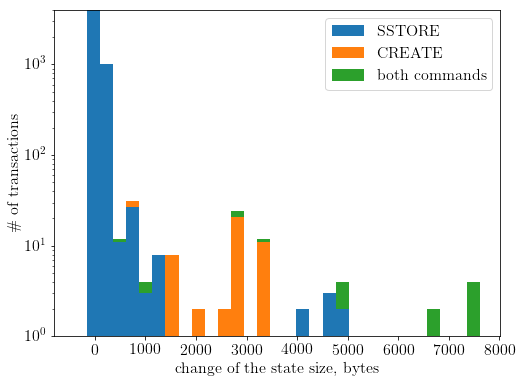

In [69]:
bytes_stored_s = storageTxs[:]['sstoreBytes']
bytes_stored_c = createTxs[:]['createBytes']
bytes_stored_b = bothTxs[:]['sstoreBytes']+bothTxs[:]['createBytes']
bytes_stored_total = data[:]['sstoreBytes']+data[:]['createBytes']

#storage_tx_load = storageTxs[:]['bytes']
#storage_tx_gas = storageTxs[:]['gasUsed']
#storage_tx_gas_except = storageTxs[:]['gasUsed'] - storageTxs[:]['sstoreGas'] -storageTxs[:]['createGas']

labels= ["SSTORE","CREATE", "both commands"]

upper = max(bytes_stored_total)
lower = min(bytes_stored_total)
fig = plt.figure(figsize=(8,6))
plt.hist([bytes_stored_s, bytes_stored_c, bytes_stored_b], stacked=True,\
         bins=range(lower, upper+55, (upper-lower+55)//(31)), label=labels)
plt.yscale('log', nonposy='clip')
plt.legend()
#plt.hist(bytes_stored,bins=range(lower, upper+55, (upper-lower+55)//(31)))
plt.xlabel('change of the state size, bytes')
plt.ylabel('\# of transactions')
plt.savefig('storage_stats.pdf')
plt.show()

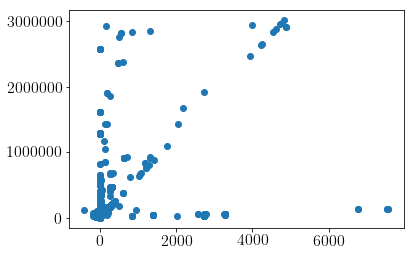

In [43]:
plt.scatter(bytes_stored_total, tx_gas - tx_gas_except)
plt.show()

In [45]:
net_load = data[:]['bytes']
computational = data[:]['gasUsed']
computational_except_s = data[:]['gasUsed'] - data[:]['sstoreGas']
computational_except_sc = data[:]['gasUsed'] - data[:]['sstoreGas'] -data[:]['createGas']
other = data[:]['otherGas']

storage = data[:]['sstoreBytes'] + data[:]['createBytes']

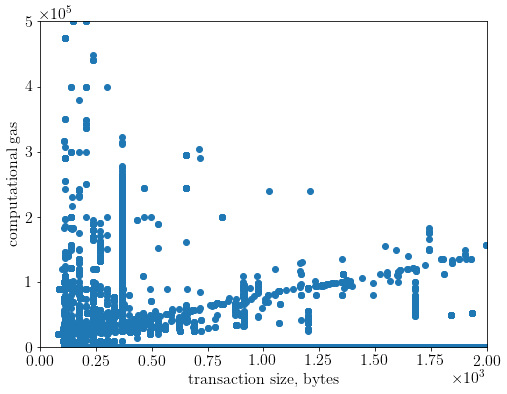

In [61]:
fig = plt.figure(figsize=(8,6))
plt.scatter(net_load, computational_except_sc,rasterized=True)
plt.xlabel('transaction size, bytes')
plt.ylabel('computational gas')

plt.xlim([0,2000])
plt.ylim([0,5e5])
plt.ticklabel_format(style='sci',scilimits=(-2,2))
plt.savefig('size_gas_small.pdf')
plt.show()

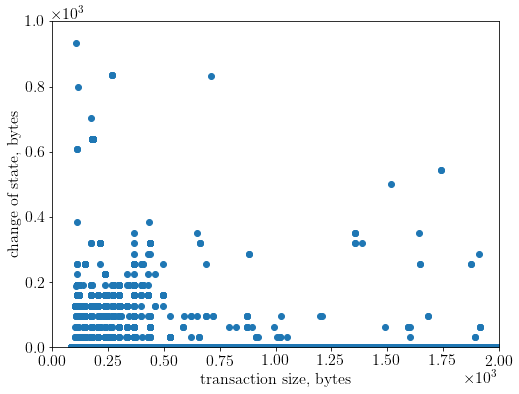

In [65]:
fig = plt.figure(figsize=(8,6))
plt.scatter(net_load, storage,rasterized=True)
xmax = 2000
ymax = 1000

plt.xlabel('transaction size, bytes')
plt.ylabel('change of state, bytes')

plt.ticklabel_format(style='sci',scilimits=(-2,2))
plt.xlim([0,xmax])
plt.ylim([0,ymax])

plt.savefig('size_storage_small.pdf')
plt.show()

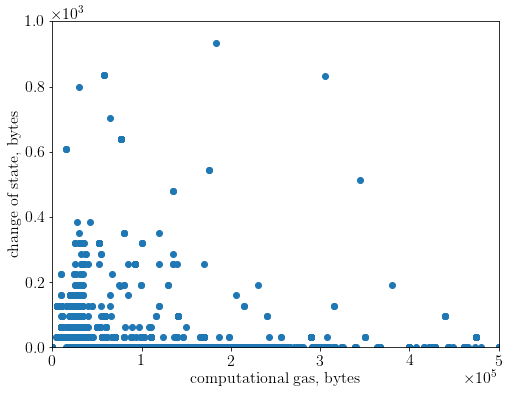

In [68]:
fig = plt.figure(figsize=(8,6))

plt.xlabel('computational gas, bytes')
plt.ylabel('change of state, bytes')

plt.ticklabel_format(style='sci',scilimits=(-2,2))
plt.scatter(computational_except_sc, storage,rasterized=True)
xmax = 5e5
ymax = 1000
plt.xlim([0,xmax])
plt.ylim([0,ymax])
plt.savefig('gas_state_small.pdf')
plt.show()

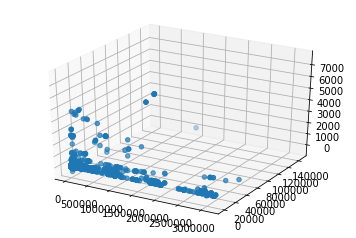

In [76]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')txs with 
ax.scatter(computational_except_sc,net_load,storage)
plt.show()